<a href="https://colab.research.google.com/github/Fatih-Onur/DSA-210-Project/blob/main/EDA_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  In this Project I have 2 datasets: 1 of them is league standings data and one of them is expenditure, balance transfers etc data. And here I will be analyizing and doing explanotary data analyzes of these datas.
Know I will be visualizing datas from the datasets. Now I will start by clean data, but one can see raw data and my code to do it in the data process folder.

##Important note. In some of the parts especially that rquires th knowledge of specisific libraries I have used LLM's unfortunately. But I guess it was permitted.

In [ ]:
# --- Exploratory Data Analysis (EDA) ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

# Load data
exp = pd.read_csv('/content/drive/MyDrive/DSA_210/expenditure_clean.csv')
succ = pd.read_csv('/content/drive/MyDrive/DSA_210/success_clean.csv')

# Merge datasets
df = pd.merge(exp, succ, on=['Year', 'Club'])


Here is my data, I am giving a little sneak peak about my data and how it looks. basically my data consistt of 2 parts one of them is sucess data of teams and one of them is their spending data here are they.

In [11]:
# Display basic info
display(df.head())
print(df.describe())

,#_x,TeamID,Year,Club,Expenditure,Arrivals,Income,Departures,Balance,#_y,...,Wins,Draws,Lose,Goals scored,Goals conceded,+/-,Points,Expenditure_quartile,Balance_group,Decade
0,1,3,2024,Aston Villa,214.2,25,257.17,25,42.97,4,...,20,8,10,76,61,15,68,Very High,Small Seller,2020
1,2,12,2024,Chelsea FC,276.0,38,228.90,32,-47.10,6,...,18,9,11,77,63,14,63,Very High,Small Spender,2020
2,3,23,2024,Manchester City,243.0,15,141.00,13,-102.00,1,...,28,7,3,96,34,62,91,Very High,Small Spender,2020
3,4,41,2024,Wolverhampton Wanderers,124.4,23,116.20,16,-8.21,14,...,13,7,18,50,65,-15,46,High,Small Spender,2020
4,5,24,2024,Manchester United,246.3,18,103.00,19,-143.30,8,...,18,6,14,57,58,-1,60,Very High,Small Spender,2020


              #_x      TeamID         Year  Expenditure    Arrivals  \
count  153.000000  153.000000   153.000000   153.000000  153.000000   
mean    89.895425   20.320261  2020.000000   113.924052   17.960784   
std     52.305424   11.829186     2.590468    82.574903    7.334922   
min      1.000000    1.000000  2016.000000     0.000000    4.000000   
25%     46.000000   12.000000  2018.000000    59.750000   13.000000   
50%     90.000000   20.000000  2020.000000    91.550000   16.000000   
75%    136.000000   30.000000  2022.000000   148.100000   23.000000   
max    180.000000   41.000000  2024.000000   630.250000   43.000000   

           Income  Departures     Balance         #_y  Matches Played  \
count  153.000000  153.000000  153.000000  153.000000           153.0   
mean    58.983529   18.215686  -54.940915    9.032680            38.0   
std     54.337565    7.048648   75.132322    4.964901             0.0   
min      0.000000    4.000000 -562.390000    1.000000            38.

Here I will start explaining my datas and visualizing them before going to hypothesis part.

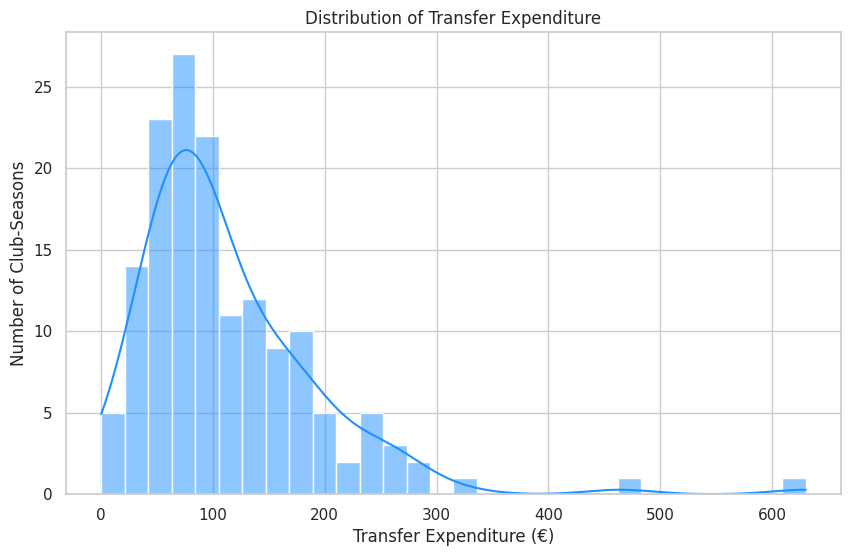


This histogram shows the distribution of transfer spending per club per season. Most clubs spend under €50M per season, while a few outliers invest far more, indicating significant financial disparities across clubs.



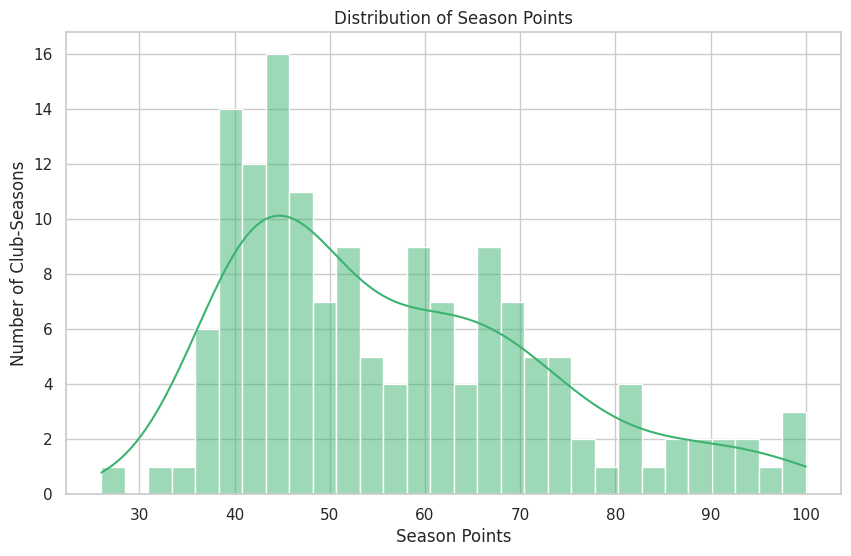


Here we see how league points are distributed among all club-seasons. Most clubs finish with 30–60 points, but there are clear variations, reflecting differences in sporting performance.



<ipython-input-9-a5436431be4d>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_spenders.values, y=top_spenders.index, palette='Blues_r')


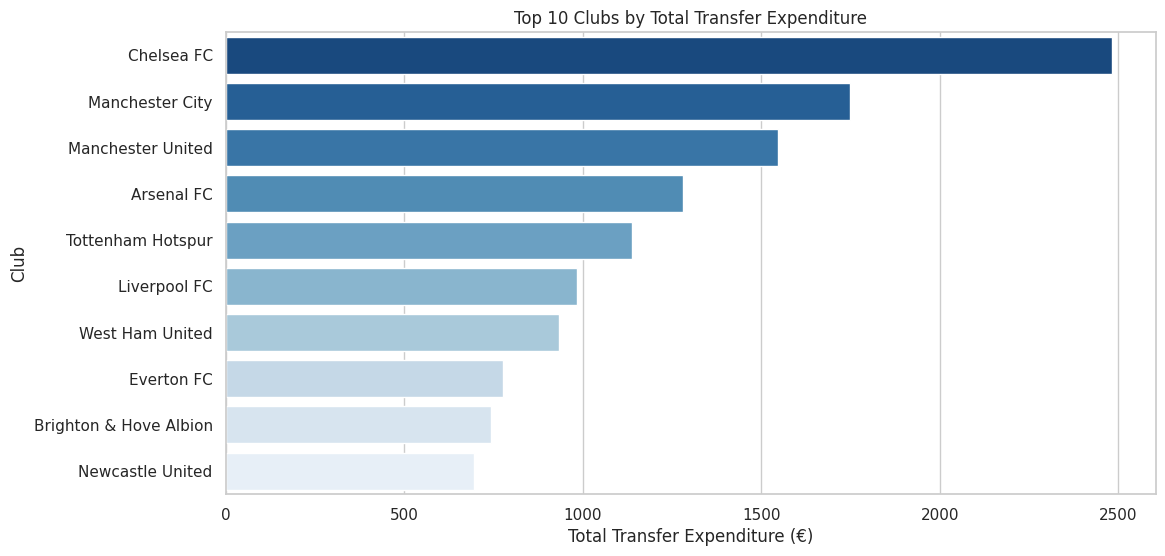


This bar chart displays the clubs with the highest cumulative transfer expenditures over the years. It highlights the dominance of financially powerful clubs in the transfer market.



<ipython-input-9-a5436431be4d>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_points.values, y=top_points.index, palette='Greens_r')


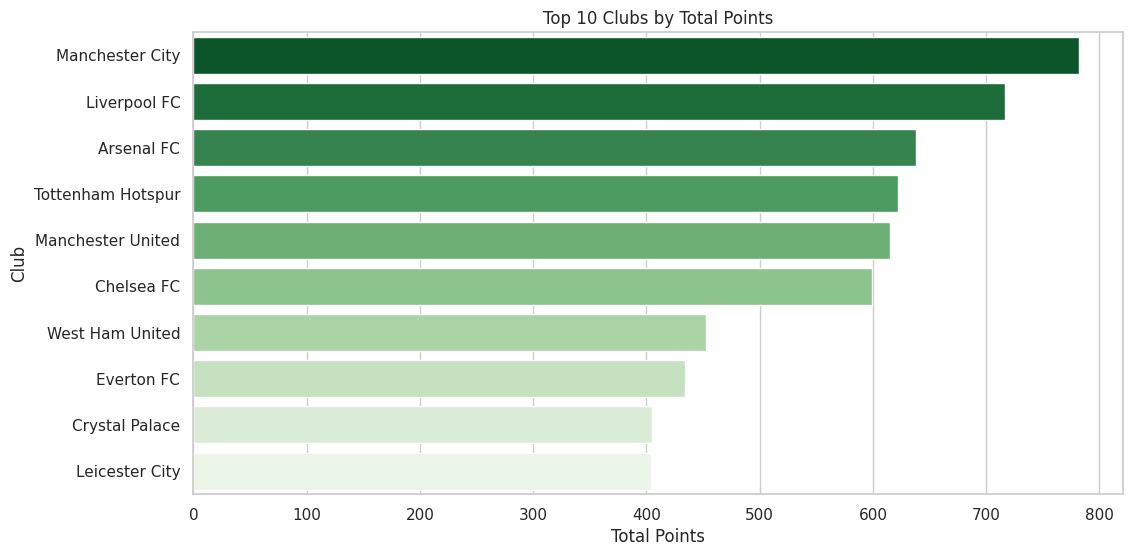


This bar chart shows the clubs with the highest total league points across all seasons, offering insight into consistently successful teams.



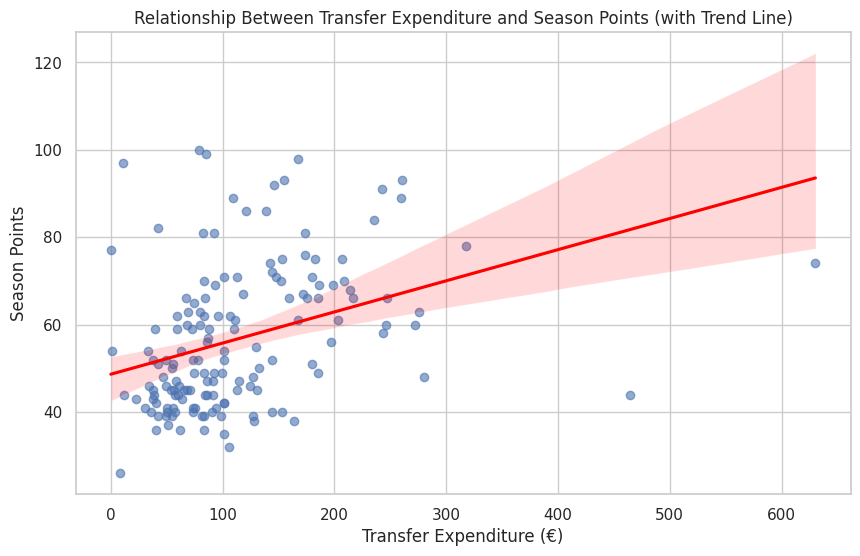


This scatter plot investigates the link between transfer spending and on-field success. While there is a general trend that higher spending leads to higher points, several exceptions suggest that money is not the only factor in sporting achievement.



<ipython-input-9-a5436431be4d>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Expenditure_quartile', y='Points', palette='Set2')


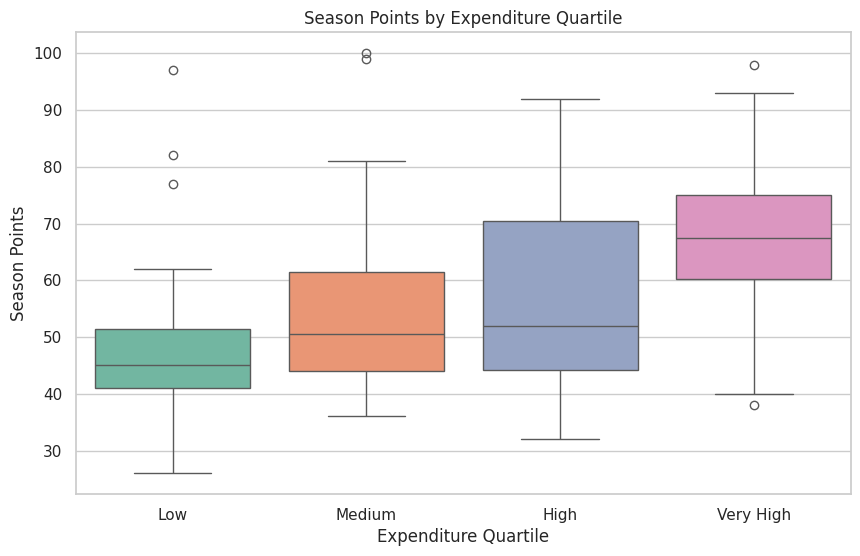


The box plot divides all club-seasons into expenditure quartiles and compares their points. While top spenders often achieve higher points, the overlap between quartiles shows that efficiency and good management matter.



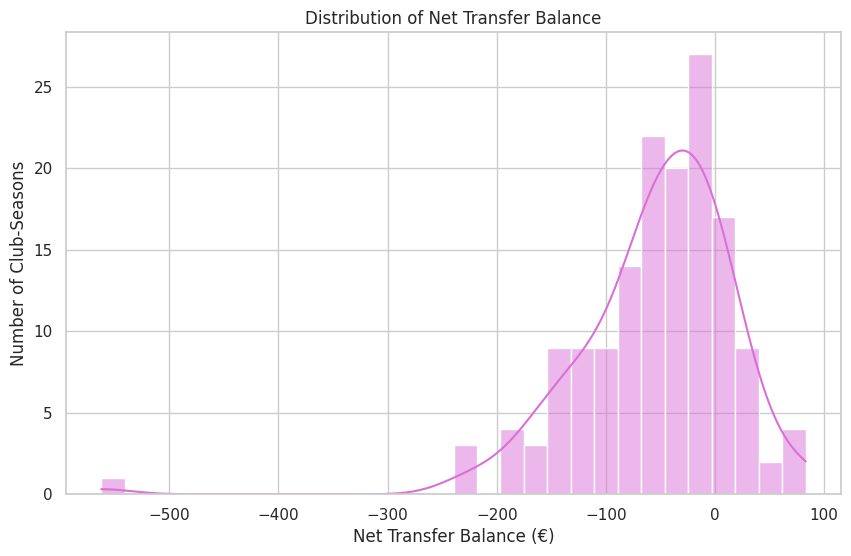


This histogram shows the net transfer balance (income minus expenditure) for each club-season. Clubs with positive balance are net sellers, while those with negative balance are net buyers, revealing different financial strategies.



<ipython-input-9-a5436431be4d>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Balance_group', y='Points', palette='coolwarm')


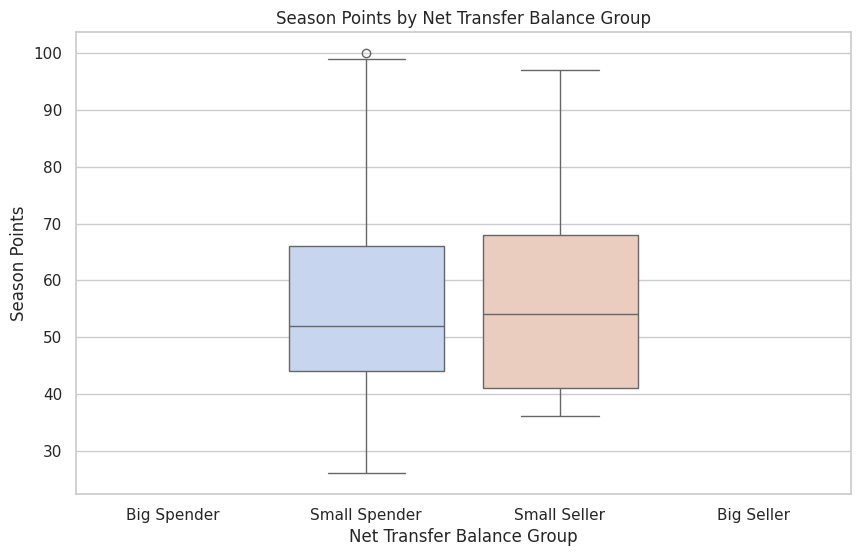


Here we compare league points for clubs with different transfer balance strategies. Big spenders often achieve higher points, but there are examples of clubs that sell more and still perform well.



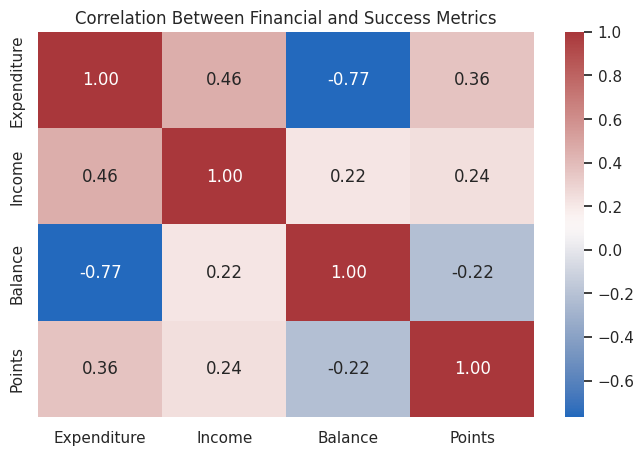


This heatmap summarizes the correlations between transfer expenditure, income, balance, and league points. It visually quantifies the relationships between financial power and sporting performance.



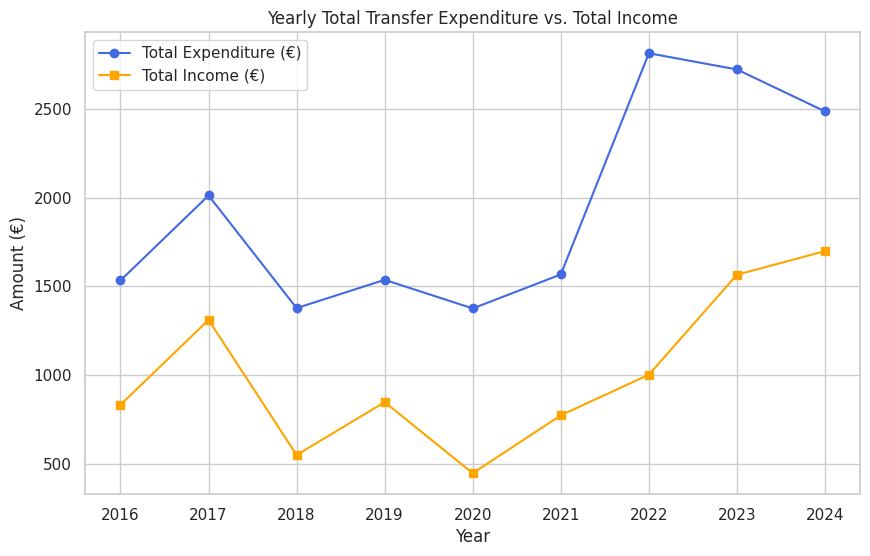


This graph shows how much football clubs are spending of their income.



In [9]:
# --- Distribution of Transfer Expenditure ---

plt.figure(figsize=(10,6))
sns.histplot(df['Expenditure'], bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of Transfer Expenditure')
plt.xlabel('Transfer Expenditure (€)')
plt.ylabel('Number of Club-Seasons')
plt.show()

print("""
This histogram shows the distribution of transfer spending per club per season. Most clubs spend under €50M per season, while a few outliers invest far more, indicating significant financial disparities across clubs.
""")

# --- Distribution of Points ---

plt.figure(figsize=(10,6))
sns.histplot(df['Points'], bins=30, kde=True, color='mediumseagreen')
plt.title('Distribution of Season Points')
plt.xlabel('Season Points')
plt.ylabel('Number of Club-Seasons')
plt.show()

print("""
Here we see how league points are distributed among all club-seasons. Most clubs finish with 30–60 points, but there are clear variations, reflecting differences in sporting performance.
""")

# --- Top 10 Clubs by Total Transfer Expenditure (Bar Chart) ---

top_spenders = df.groupby('Club')['Expenditure'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_spenders.values, y=top_spenders.index, palette='Blues_r')
plt.title('Top 10 Clubs by Total Transfer Expenditure')
plt.xlabel('Total Transfer Expenditure (€)')
plt.ylabel('Club')
plt.show()

print("""
This bar chart displays the clubs with the highest cumulative transfer expenditures over the years. It highlights the dominance of financially powerful clubs in the transfer market.
""")

# --- Top 10 Clubs by Total Points (Bar Chart) ---

top_points = df.groupby('Club')['Points'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_points.values, y=top_points.index, palette='Greens_r')
plt.title('Top 10 Clubs by Total Points')
plt.xlabel('Total Points')
plt.ylabel('Club')
plt.show()

print("""
This bar chart shows the clubs with the highest total league points across all seasons, offering insight into consistently successful teams.
""")

# --- Relationship Between Expenditure and Points (Scatter) ---

plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Expenditure', y='Points', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship Between Transfer Expenditure and Season Points (with Trend Line)')
plt.xlabel('Transfer Expenditure (€)')
plt.ylabel('Season Points')
plt.show()


print("""
This scatter plot investigates the link between transfer spending and on-field success. While there is a general trend that higher spending leads to higher points, several exceptions suggest that money is not the only factor in sporting achievement.
""")

# --- Boxplot: Season Points by Expenditure Quartile ---

df['Expenditure_quartile'] = pd.qcut(df['Expenditure'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Expenditure_quartile', y='Points', palette='Set2')
plt.title('Season Points by Expenditure Quartile')
plt.xlabel('Expenditure Quartile')
plt.ylabel('Season Points')
plt.show()

print("""
The box plot divides all club-seasons into expenditure quartiles and compares their points. While top spenders often achieve higher points, the overlap between quartiles shows that efficiency and good management matter.
""")

# --- Histogram: Net Transfer Balance ---

plt.figure(figsize=(10,6))
sns.histplot(df['Balance'], bins=30, kde=True, color='orchid')
plt.title('Distribution of Net Transfer Balance')
plt.xlabel('Net Transfer Balance (€)')
plt.ylabel('Number of Club-Seasons')
plt.show()

print("""
This histogram shows the net transfer balance (income minus expenditure) for each club-season. Clubs with positive balance are net sellers, while those with negative balance are net buyers, revealing different financial strategies.
""")

# --- Boxplot: Points by Net Transfer Balance Group ---

df['Balance_group'] = pd.cut(df['Balance'], [-float('inf'), -10_000_000, 0, 10_000_000, float('inf')],
                             labels=['Big Spender', 'Small Spender', 'Small Seller', 'Big Seller'])

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Balance_group', y='Points', palette='coolwarm')
plt.title('Season Points by Net Transfer Balance Group')
plt.xlabel('Net Transfer Balance Group')
plt.ylabel('Season Points')
plt.show()

print("""
Here we compare league points for clubs with different transfer balance strategies. Big spenders often achieve higher points, but there are examples of clubs that sell more and still perform well.
""")

# --- Correlation Matrix ---

plt.figure(figsize=(8,5))
corr = df[['Expenditure', 'Income', 'Balance', 'Points']].corr()
sns.heatmap(corr, annot=True, cmap='vlag', fmt=".2f")
plt.title('Correlation Between Financial and Success Metrics')
plt.show()

print("""
This heatmap summarizes the correlations between transfer expenditure, income, balance, and league points. It visually quantifies the relationships between financial power and sporting performance.
""")

# --- Yearly Evolution of Total and Average Expenditure ---

plt.figure(figsize=(10,6))
total_exp = df.groupby('Year')['Expenditure'].sum()
total_income = df.groupby('Year')['Income'].sum()
plt.plot(total_exp.index, total_exp.values, marker='o', label='Total Expenditure (€)', color='royalblue')
plt.plot(total_income.index, total_income.values, marker='s', label='Total Income (€)', color='orange')
plt.title('Yearly Total Transfer Expenditure vs. Total Income')
plt.xlabel('Year')
plt.ylabel('Amount (€)')
plt.legend()
plt.grid(True)
plt.show()

print("""
This graph shows how much football clubs are spending of their income.
""")




Now we will do a case study selecting a club to see only one clubs realtion betweeen spending and its points.
This mini case study explores whether their spending patterns align with their league success(Hopefully).
 Here I choose Totenham Hotspur a club that spends wisely but logicly.

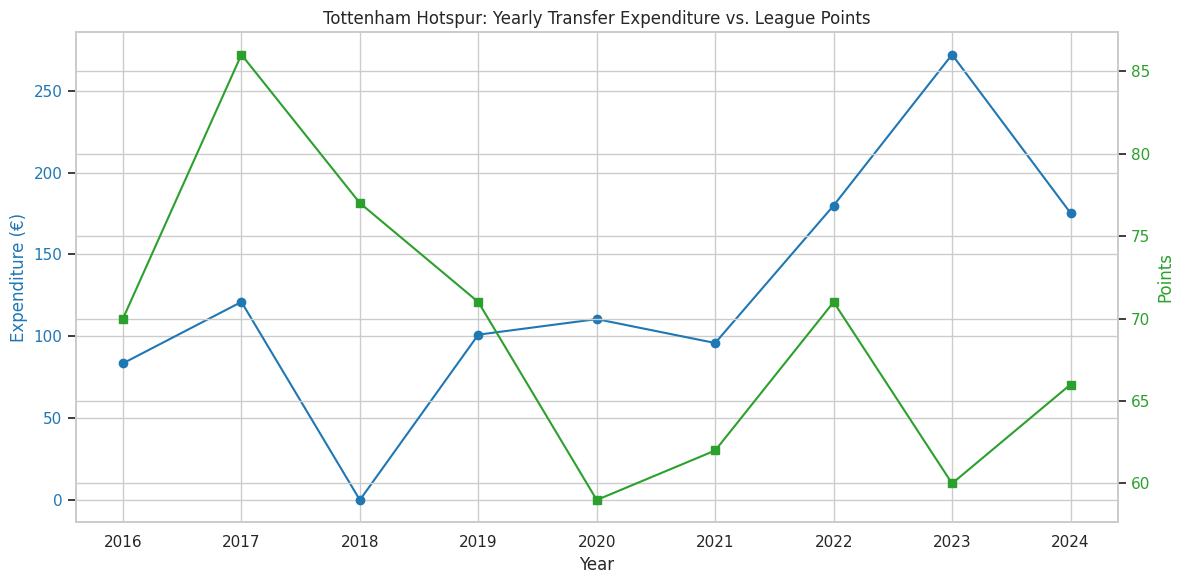

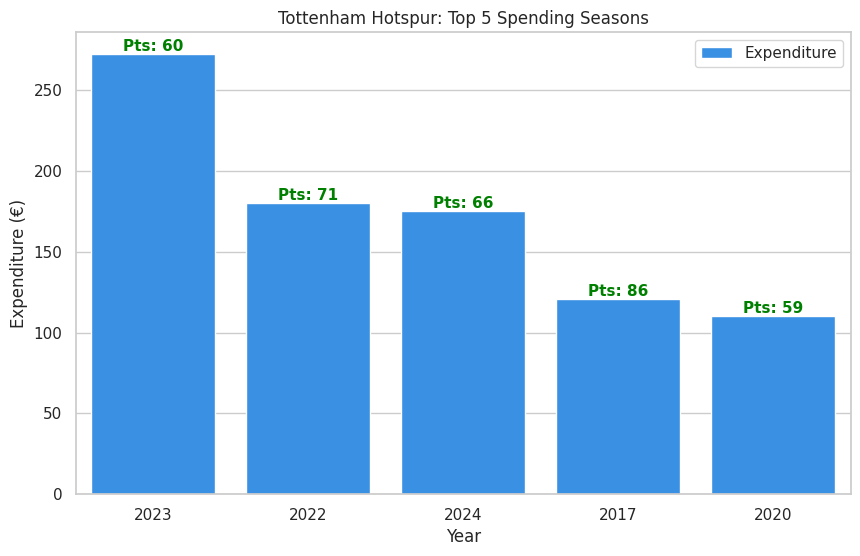

In [7]:
# Select Tottenham Hotspur from the dataframe (change the name if needed)
club_name = "Tottenham Hotspur"   # Try "Tottenham" if this does not work!
club_df = df[df['Club'].str.contains('Tottenham', case=False, na=False)].sort_values('Year')

if club_df.empty:
    raise ValueError("No data for Tottenham Hotspur found. Adjust 'club_name' to match your dataset.")

# --- Yearly Expenditure vs. Points (Dual-Axis Line Plot) ---
fig, ax1 = plt.subplots(figsize=(12,6))

color1 = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Expenditure (€)', color=color1)
ax1.plot(club_df['Year'], club_df['Expenditure'], color=color1, marker='o', label='Expenditure')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('Points', color=color2)
ax2.plot(club_df['Year'], club_df['Points'], color=color2, marker='s', label='Points')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title(f'{club_name}: Yearly Transfer Expenditure vs. League Points')
fig.tight_layout()
plt.show()


# --- Annotated Bar: Top 5 Spending Seasons and Points ---
top5_seasons = club_df.sort_values('Expenditure', ascending=False).head(5)
plt.figure(figsize=(10,6))
sns.barplot(x=top5_seasons['Year'].astype(str), y=top5_seasons['Expenditure'], color='dodgerblue', label='Expenditure')
plt.ylabel('Expenditure (€)')
plt.xlabel('Year')
plt.title(f'{club_name}: Top 5 Spending Seasons')

# Annotate points on top
for idx, row in top5_seasons.iterrows():
    plt.text(
        x=top5_seasons['Year'].astype(str).tolist().index(str(row['Year'])),
        y=row['Expenditure'],
        s=f"Pts: {int(row['Points'])}",
        ha='center', va='bottom', color='green', fontsize=11, fontweight='bold'
    )
plt.show()


Here In this case since spending of a transfer window affect not only that season rather affects also next seasons. Here we can see that tottenhams little to non spending at 2018 may have affected their next seasons as can be seen from first graph.

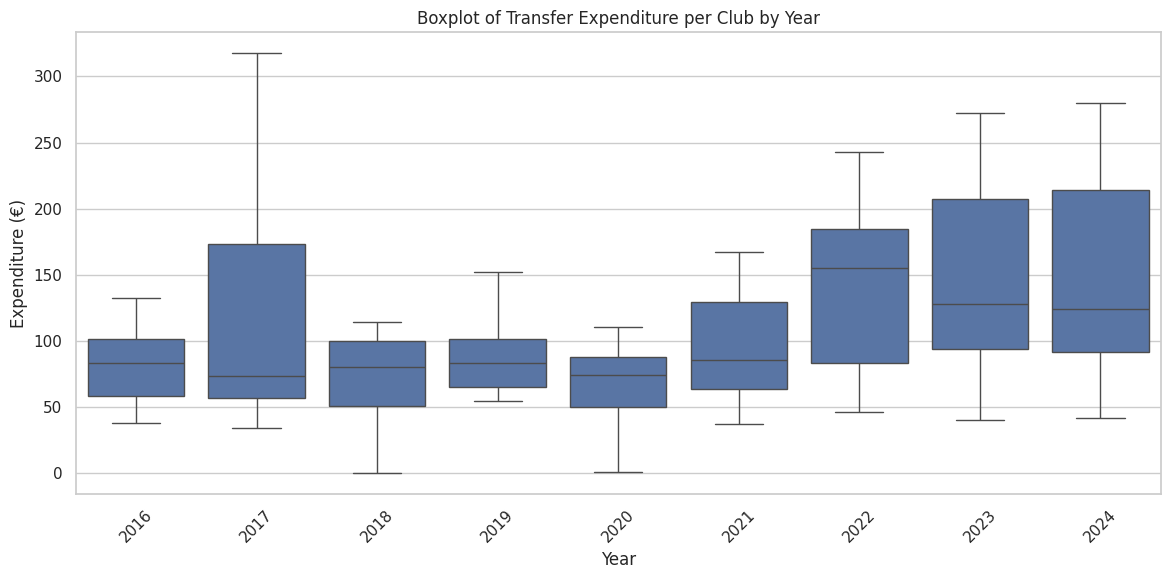


This boxplot displays how transfer spending is distributed among clubs for each year. The widening range suggests increasing disparity between wealthy and less wealthy clubs.



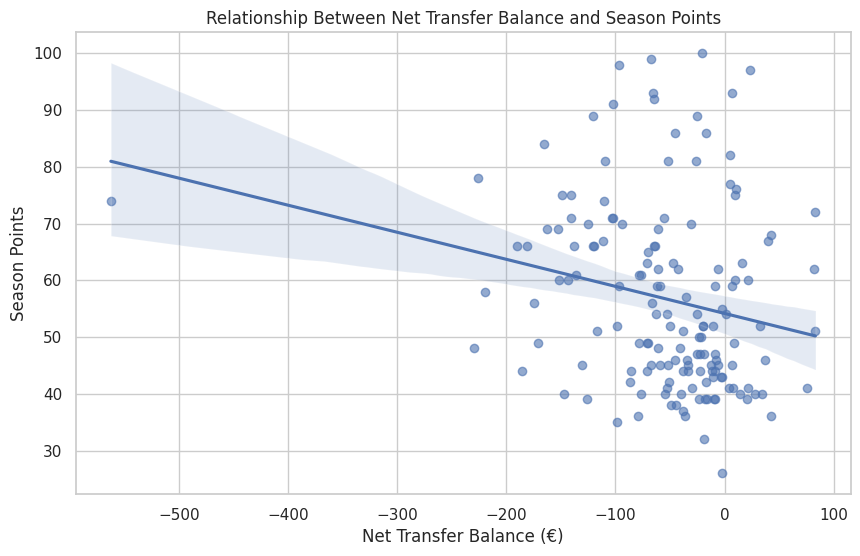


This scatter plot, combined with a regression line, highlights the relationship between net transfer balance and league points. While spending more than earning can help, some clubs are able to succeed despite selling more players than they buy.



In [10]:
# --- Yearly Boxplot of Expenditure per Club ---

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Year', y='Expenditure', showfliers=False)
plt.title('Boxplot of Transfer Expenditure per Club by Year')
plt.xlabel('Year')
plt.ylabel('Expenditure (€)')
plt.xticks(rotation=45)
plt.show()

print("""
This boxplot displays how transfer spending is distributed among clubs for each year. The widening range suggests increasing disparity between wealthy and less wealthy clubs.
""")


# --- Relationship Between Net Transfer Balance and Points (Scatter with Regression Line) ---

plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Balance', y='Points', scatter_kws={'alpha':0.6})
plt.title('Relationship Between Net Transfer Balance and Season Points')
plt.xlabel('Net Transfer Balance (€)')
plt.ylabel('Season Points')
plt.show()

print("""
This scatter plot, combined with a regression line, highlights the relationship between net transfer balance and league points. While spending more than earning can help, some clubs are able to succeed despite selling more players than they buy.
""")

# Optional: Save plots if needed
# plt.savefig("your_plot.png")

# --- END OF EDA SECTION ---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
# Read Files
expenditure_df = pd.read_csv("/content/drive/MyDrive/DSA_210/expenditure.csv")
success_df = pd.read_csv("/content/drive/MyDrive/DSA_210/success.csv")

# As a part of EDA I am here filling the missing datas
expenditure_df.fillna(0, inplace=True)
success_df.fillna(0, inplace=True)

# chechking the results for a few lines to check only.
print("Harcama verisi (ilk 5 satır):")
print(expenditure_df.head())
print("\nBaşarı verisi (ilk 5 satır):")
print(success_df.head())

# Save cleaned versions to Google Drive
expenditure_df.to_csv("/content/drive/MyDrive/DSA_210/expenditure_clean.csv", index=False)
success_df.to_csv("/content/drive/MyDrive/DSA_210/success_clean.csv", index=False)

Harcama verisi (ilk 5 satır):
   #  TeamID  Year                     Club  Expenditure  Arrivals  Income  \
0  1       3  2024              Aston Villa        214.2        25  257.17   
1  2      12  2024               Chelsea FC        276.0        38  228.90   
2  3      23  2024          Manchester City        243.0        15  141.00   
3  4      41  2024  Wolverhampton Wanderers        124.4        23  116.20   
4  5      24  2024        Manchester United        246.3        18  103.00   

   Departures  Balance  
0          25    42.97  
1          32   -47.10  
2          13  -102.00  
3          16    -8.21  
4          19  -143.30  

Başarı verisi (ilk 5 satır):
   Year  #               Club  club abbrevation  Matches Played  Wins  Draws  \
0  2025  1       Liverpool FC                 0              33    24      7   
1  2025  2         Arsenal FC                 0              34    18     13   
2  2025  3    Manchester City                 0              34    18      7   
3

Here is the expenditure by football clubs yearly. This is the total data of the football clubs. It shows the increasing expenditures among all football clubs.

especially there is a situation to look for here, with the 2020 year the covid pandemic started. it changed the world as everyone knows but it had an increadible impact on football businesss. Meanwhile affecing the businesses in very bad way generally The covid pandemic strangely increased the demand for better players among football clubs and many records were broken because of increadible spending of football clubs. it strangely increased the value of players therefore increased the players worth.

It can easly be seen in all of the figures that will come after this grapphs as well. As you can see everything changes fter covid pandemic startes.

Eventhough we negect the affect of covid pandemic on football players value we can still visibly see the difference and increase in the spending of clubs. It is because of not one reasen of course but among one of the reaseons is inflation and increase in popularity of both football and premier league among other leagues

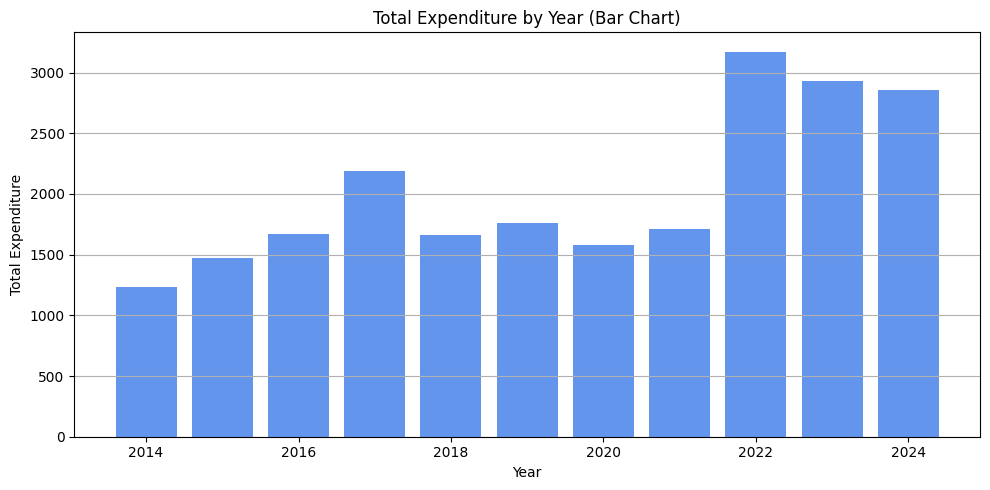

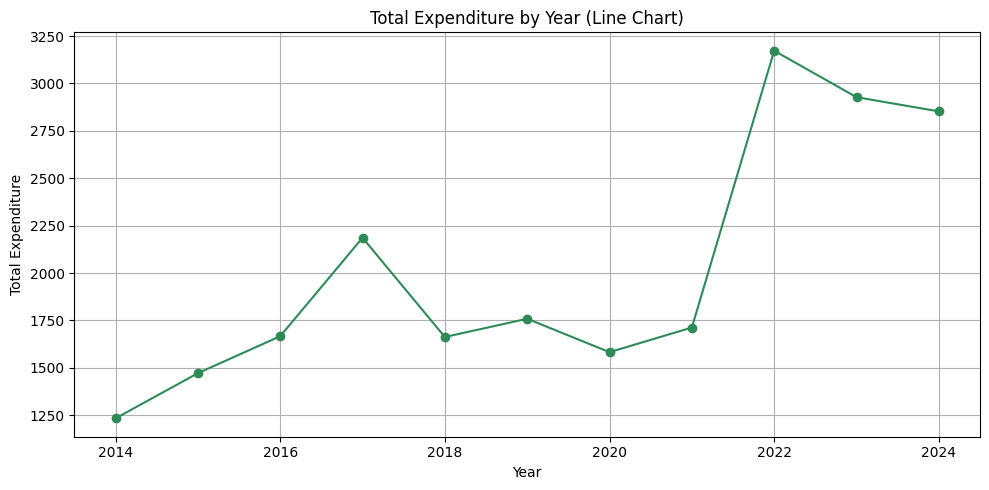

In [57]:
import matplotlib.pyplot as plt

# Group by Year and sum the Expenditure
yearly_expenditure = expenditure_df.groupby("Year")["Expenditure"].sum().reset_index()

# Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(yearly_expenditure["Year"], yearly_expenditure["Expenditure"], color='cornflowerblue')
plt.title("Total Expenditure by Year (Bar Chart)")
plt.xlabel("Year")
plt.ylabel("Total Expenditure")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Line Chart
plt.figure(figsize=(10, 5))
plt.plot(yearly_expenditure["Year"], yearly_expenditure["Expenditure"], marker='o', color='seagreen')
plt.title("Total Expenditure by Year (Line Chart)")
plt.xlabel("Year")
plt.ylabel("Total Expenditure")
plt.grid(True)
plt.tight_layout()
plt.show()


From this graph it can also be seen that, football business is a huge business. just one leagues among the world football teams are spending these amounts just for transfers. This does not includes any wage or other operational costs of clubs.

But after all of this spending figures one might wonder whethee this spend,ng is widely spread among football clubs. Afterall there are 20 clubs dynamicly changing in this league and if they are spending nearly same amounts, it would be a great league to wathc since the league will be incredibe challenging league. But as can be seen in the next figure their spendings are not even close to each others spendings. This also should reflect the sucess right? may be . so the goal of this project is to check if this is real. or at least at some aspect.

Therefore you can see the comparison between one of the highest spending, avareage spending and lowest spending clubs difference.

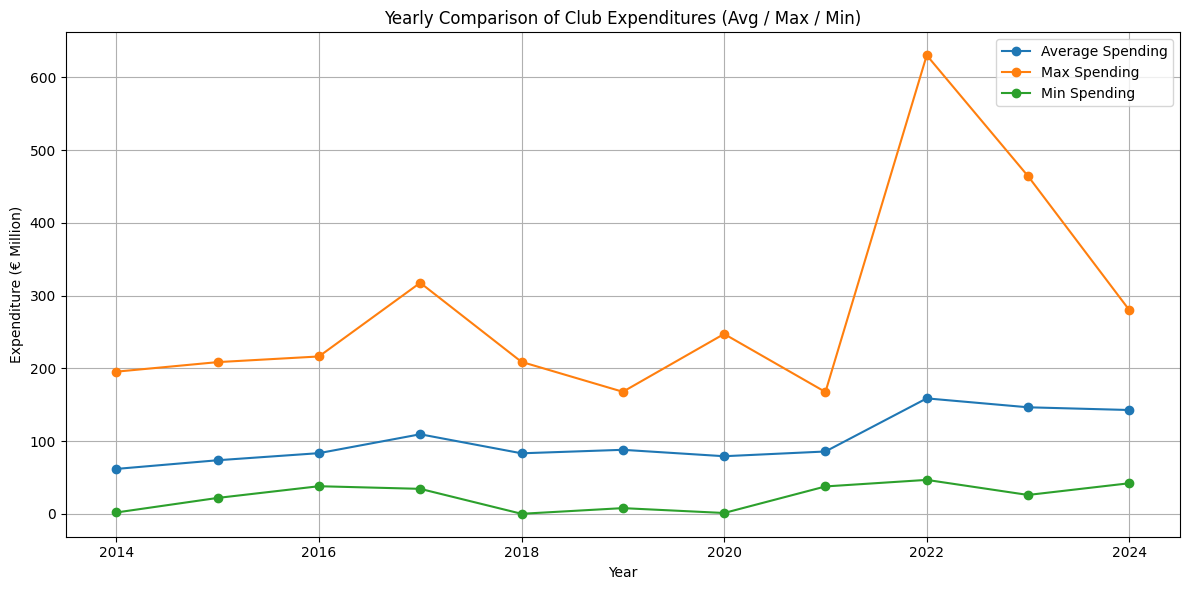

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Dosyayı oku
expenditure_df = pd.read_csv('/content/drive/MyDrive/DSA_210/expenditure.csv')

# Boş değerleri doldur
expenditure_df.fillna(0, inplace=True)

# Veriyi yıllara göre grupla
average_by_year = expenditure_df.groupby("Year")["Expenditure"].mean()
max_by_year = expenditure_df.groupby("Year")["Expenditure"].max()
min_by_year = expenditure_df.groupby("Year")["Expenditure"].min()

# Grafik
plt.figure(figsize=(12, 6))
plt.plot(average_by_year.index, average_by_year.values, marker='o', label='Average Spending')
plt.plot(max_by_year.index, max_by_year.values, marker='o', label='Max Spending')
plt.plot(min_by_year.index, min_by_year.values, marker='o', label='Min Spending')

plt.title('Yearly Comparison of Club Expenditures (Avg / Max / Min)')
plt.xlabel('Year')
plt.ylabel('Expenditure (€ Million)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

This can also be showed like this. It might be better to understand in this form because the major difference is much more visible. As you can see at some years the lowest spending clubs expenditure bar is not even visible because of the amount in difference.

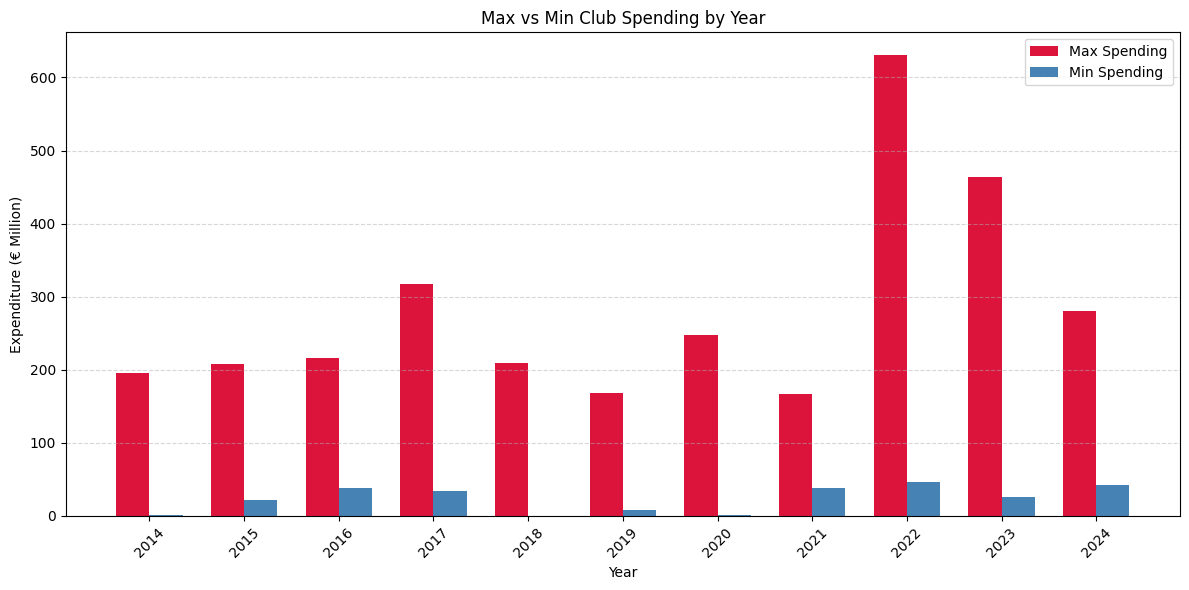

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Veriyi oku
df = pd.read_csv('/content/drive/MyDrive/DSA_210/expenditure.csv')
df.fillna(0, inplace=True)

# Yıllık max ve min harcama
max_by_year = df.groupby("Year")["Expenditure"].max()
min_by_year = df.groupby("Year")["Expenditure"].min()

years = max_by_year.index
x = np.arange(len(years))  # X ekseni için pozisyonlar
bar_width = 0.35

# Grafik
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, max_by_year.values, width=bar_width, label='Max Spending', color='crimson')
plt.bar(x + bar_width/2, min_by_year.values, width=bar_width, label='Min Spending', color='steelblue')

plt.xticks(x, years, rotation=45)
plt.title("Max vs Min Club Spending by Year")
plt.xlabel("Year")
plt.ylabel("Expenditure (€ Million)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Now lets start to sneak peak a little to their success stories. Here  is a graph to check whether a team like manchester city's expenditure data of a current year does actuallly affetc the success in the upcoming year.
of course this might not be the best thing to look for especially teamls like manchester city are making long term deals to gain young and talennted players, Yet this can show us if short terms transfers affect short term success.

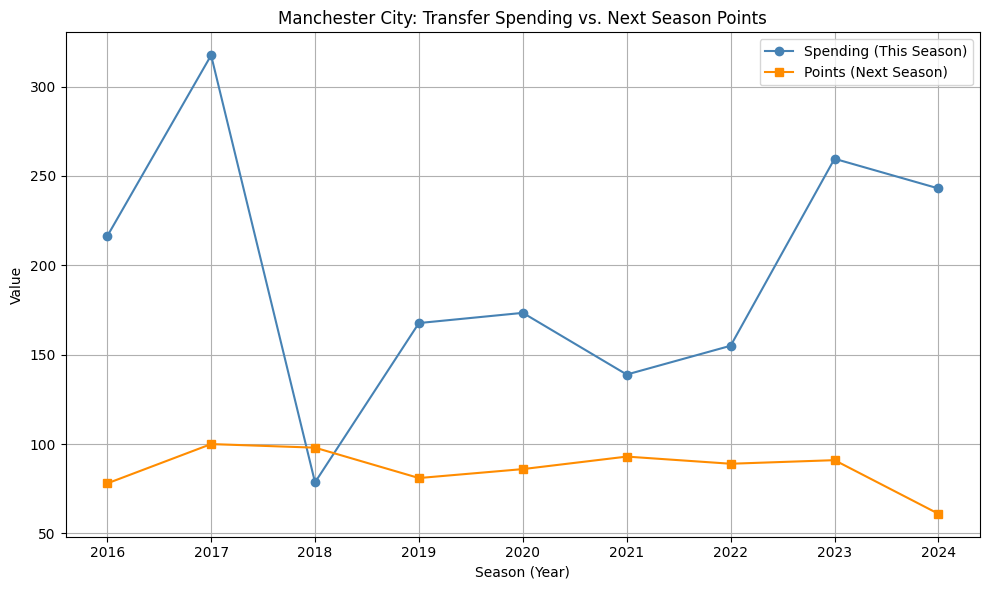

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Dosyaları oku
exp_df = pd.read_csv('/content/drive/MyDrive/DSA_210/expenditure.csv')
success_df = pd.read_csv('/content/drive/MyDrive/DSA_210/success.csv')

# Boşlukları doldur
exp_df.fillna(0, inplace=True)
success_df.fillna(0, inplace=True)

# Sadece Manchester City'yi filtrele
team_exp = exp_df[exp_df["Club"] == "Manchester City"].copy()
team_success = success_df[success_df["Club"] == "Manchester City"].copy()

# Year sırasına göre sırala
team_exp = team_exp.sort_values("Year").reset_index(drop=True)
team_success = team_success.sort_values("Year").reset_index(drop=True)

# Harcamanın yapıldığı yıla karşılık, 1 yıl sonraki puanı getireceğiz
# Bunun için success verisindeki puanları 1 yıl geri kaydır (yani harcama yılına hizala)
team_success["Next_Season_Points"] = team_success["Points"].shift(-1)

# Yıl ve takım bazında merge et (eşleştir)
merged_df = pd.merge(team_exp, team_success[["Club", "Year", "Next_Season_Points"]],
                     on=["Club", "Year"], how="inner")

# Null varsa at
merged_df.dropna(subset=["Next_Season_Points"], inplace=True)

# Grafik
plt.figure(figsize=(10, 6))
plt.plot(merged_df["Year"], merged_df["Expenditure"], marker='o', label="Spending (This Season)", color='steelblue')
plt.plot(merged_df["Year"], merged_df["Next_Season_Points"], marker='s', label="Points (Next Season)", color='darkorange')

plt.title("Manchester City: Transfer Spending vs. Next Season Points")
plt.xlabel("Season (Year)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This graph shows their spending vs their points but we are looking for something else actually if we want to analyze success, It might not be correct to to analyze their points. since it reflect many aspects of their team expecially their previous team. this also goes for their league standing. Buut if we llok to their points change we can see how much did the new transfers affected their success really. And terefore this is the exact graph for this objective:

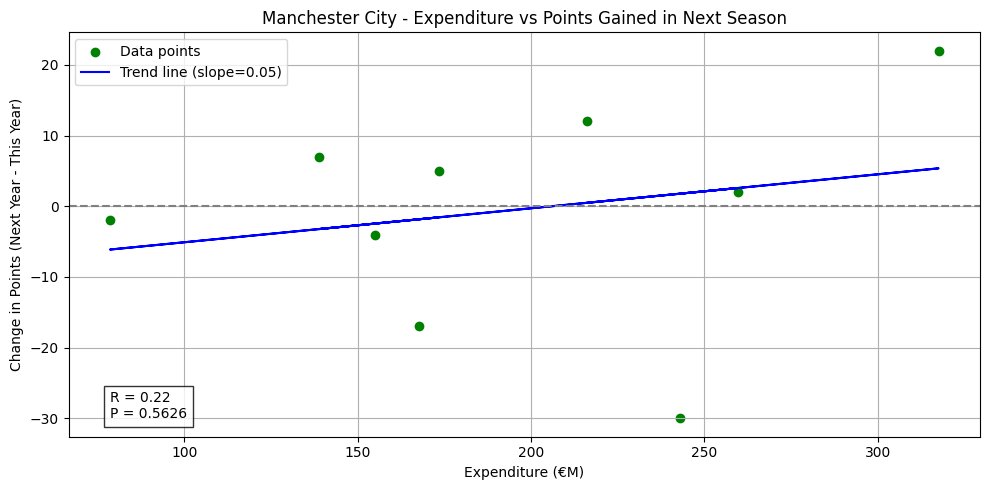

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# CSV dosyalarını oku
exp_df = pd.read_csv('/content/drive/MyDrive/DSA_210/expenditure.csv')
success_df = pd.read_csv('/content/drive/MyDrive/DSA_210/success.csv')

# Takımı seç
team_name = "Manchester City"

# Sadece ilgili takımın verisini filtrele
exp_team = exp_df[exp_df["Club"] == team_name].copy()
success_team = success_df[success_df["Club"] == team_name].copy()

# Başarı verisini yıl bazında sırala ve puan farkını hesapla
success_team.sort_values("Year", inplace=True)
success_team["Next_Year_Points"] = success_team["Points"].shift(-1)
success_team["Points_Diff"] = success_team["Next_Year_Points"] - success_team["Points"]

# Harcama yapılan yılın, puan farkı yaratacağı seneyi eşle (yani Year = Year)
merged = pd.merge(exp_team, success_team, on=["Year", "Club"])

# Sadece gerekli sütunları al
merged = merged[["Year", "Expenditure", "Points_Diff"]].dropna()

# Regresyon analizi
x = merged["Expenditure"]
y = merged["Points_Diff"]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

# Grafik
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='green', label='Data points')
plt.plot(x, line, color='blue', label=f'Trend line (slope={slope:.2f})')
plt.axhline(y=0, color='gray', linestyle='--')

# Başlık ve açıklamalar
plt.title(f'{team_name} - Expenditure vs Points Gained in Next Season')
plt.xlabel('Expenditure (€M)')
plt.ylabel('Change in Points (Next Year - This Year)')
plt.grid(True)

# Korelasyon ve p-value'yu yazdır
plt.text(x.min(), y.min(), f'R = {r_value:.2f}\nP = {p_value:.4f}',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.legend()
plt.tight_layout()
plt.show()


Here we see a litttle correlation yet this is not enough and as you can see the p value is extremely high but of course this is for just one team if we widen this we can see this graph:

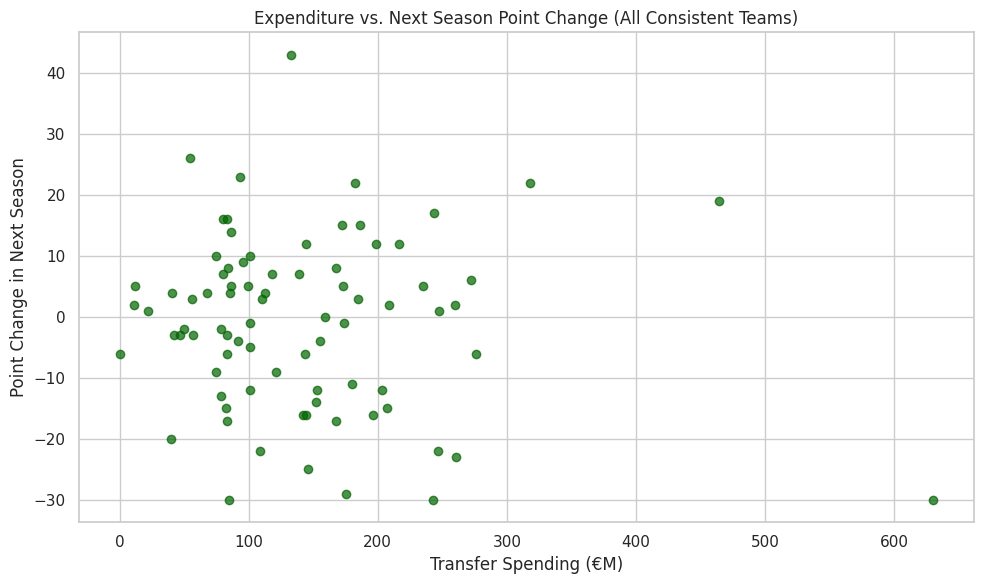

Overall Correlation: -0.10
P-value: 0.3537


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Verileri yükle
expenditure_df = pd.read_csv('/content/drive/MyDrive/DSA_210/expenditure.csv')
success_df = pd.read_csv('/content/drive/MyDrive/DSA_210/success.csv')

# Boşlukları doldur
expenditure_df.fillna(0, inplace=True)
success_df.fillna(0, inplace=True)

# Tüm sezonlarda yer alan takımları bul
teams_all_years = success_df.groupby("Club")["Year"].nunique()
consistent_teams = teams_all_years[teams_all_years == success_df["Year"].nunique()].index.tolist()

# Verileri birleştirmek için boş liste
all_data = []

# Her takım için veriyi topla
for team in consistent_teams:
    team_exp = expenditure_df[expenditure_df["Club"] == team][["Year", "Expenditure"]].copy()
    team_succ = success_df[success_df["Club"] == team][["Year", "Points"]].copy()

    team_exp["Next_Year"] = team_exp["Year"] + 1
    merged = pd.merge(team_exp, team_succ, left_on="Next_Year", right_on="Year", suffixes=("_spend", "_points"))

    prev_season = success_df[success_df["Club"] == team][["Year", "Points"]].rename(columns={"Points": "Prev_Points"})
    merged = pd.merge(merged, prev_season, left_on="Year_spend", right_on="Year", how="left")

    merged["Point_Change"] = merged["Points"] - merged["Prev_Points"]
    merged["Club"] = team

    all_data.append(merged[["Expenditure", "Point_Change", "Club"]])

# Hepsini birleştir
final_df = pd.concat(all_data, ignore_index=True).dropna()

# Grafik
plt.figure(figsize=(10, 6))
plt.scatter(final_df["Expenditure"], final_df["Point_Change"], alpha=0.7, c='darkgreen')
plt.title("Expenditure vs. Next Season Point Change (All Consistent Teams)")
plt.xlabel("Transfer Spending (€M)")
plt.ylabel("Point Change in Next Season")
plt.grid(True)
plt.tight_layout()
plt.show()

# Korelasyon ve p-değeri
corr, p_value = pearsonr(final_df["Expenditure"], final_df["Point_Change"])
print(f"Overall Correlation: {corr:.2f}")
print(f"P-value: {p_value:.4f}")


Here eventhough the p value is a little smaller it is far away than expected So we make a conclusion that this expenditures of football clubs might not change their success in the short term but we will check it again in the hypothesis part.

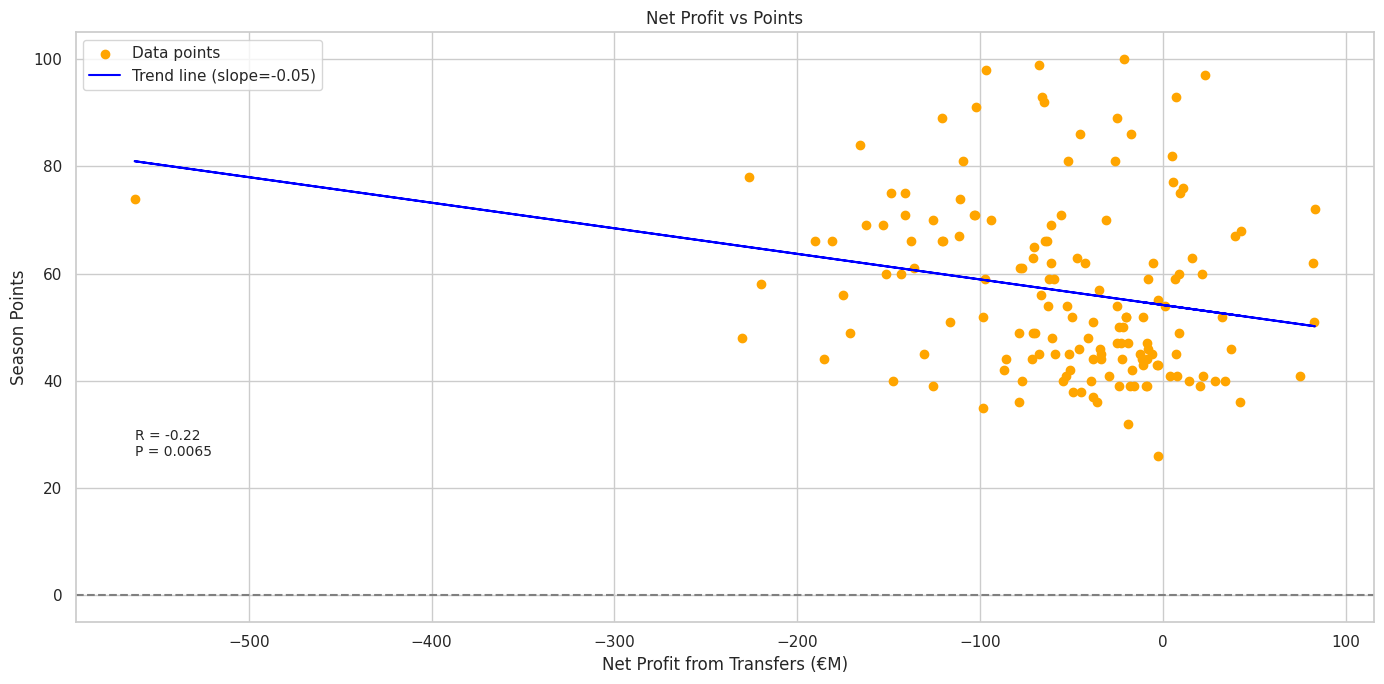

In [16]:
# Files
exp_path = '/content/drive/MyDrive/DSA_210/expenditure_clean.csv'
succ_path = '/content/drive/MyDrive/DSA_210/success_clean.csv'

# read files
exp_df = pd.read_csv(exp_path)
success_df = pd.read_csv(succ_path)

# Merge
merged_df = pd.merge(exp_df, success_df, on=["Year", "Club"])
merged_df = merged_df[["Club", "Year", "Balance", "Points"]].dropna()

# Variable
x = merged_df["Balance"]
y = merged_df["Points"]

# Regression
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

# Graph
plt.figure(figsize=(14, 7))
plt.scatter(x, y, color='orange', label='Data points')

# (No annotation loop here!)

# Trend line
plt.plot(x, line, color='blue', label=f'Trend line (slope={slope:.2f})')
plt.axhline(y=0, color='gray', linestyle='--')

# Header etc.
plt.title('Net Profit vs Points')
plt.xlabel('Net Profit from Transfers (€M)')
plt.ylabel('Season Points')
plt.grid(True)

plt.text(x.min(), y.min(), f'R = {r_value:.2f}\nP = {p_value:.4f}',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.legend()
plt.tight_layout()
plt.show()


Here some questions comes to mind. Does spending doesn't really matter, is this possible. of course it does matter, as a matter of fact it drastically matters. Lets see this through this graph:

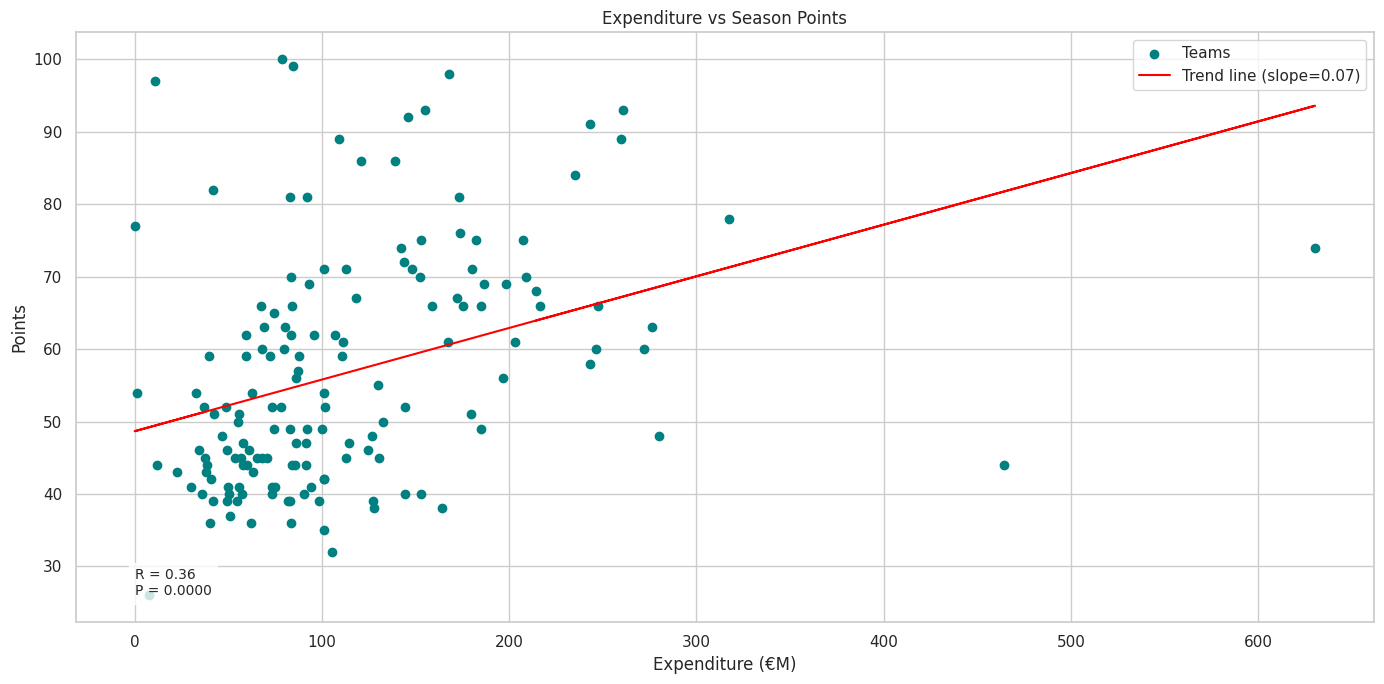

In [18]:
# Read the data
exp_df = pd.read_csv('/content/drive/MyDrive/DSA_210/expenditure_clean.csv')
success_df = pd.read_csv('/content/drive/MyDrive/DSA_210/success_clean.csv')

# Merge datasets
merged_df = pd.merge(exp_df, success_df, on=["Year", "Club"])
merged_df = merged_df[["Club", "Year", "Expenditure", "Points"]].dropna()

# X, Y values
x = merged_df["Expenditure"]
y = merged_df["Points"]

# Regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

# Plot
plt.figure(figsize=(14, 7))
plt.scatter(x, y, color='teal', label='Teams')
plt.plot(x, line, color='red', label=f'Trend line (slope={slope:.2f})')

# (No annotation loop here!)

plt.title("Expenditure vs Season Points")
plt.xlabel("Expenditure (€M)")
plt.ylabel("Points")
plt.grid(True)
plt.text(x.min(), y.min(), f'R = {r_value:.2f}\nP = {p_value:.4f}', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend()
plt.tight_layout()
plt.show()


In this graph wee see every teams every season success values compared by their spendings. And if you focus on the R and p values there seems to be a correlation between spending and success. Yet especially this data doesnt reflect long term spending this can really differ in long term data, now check that:

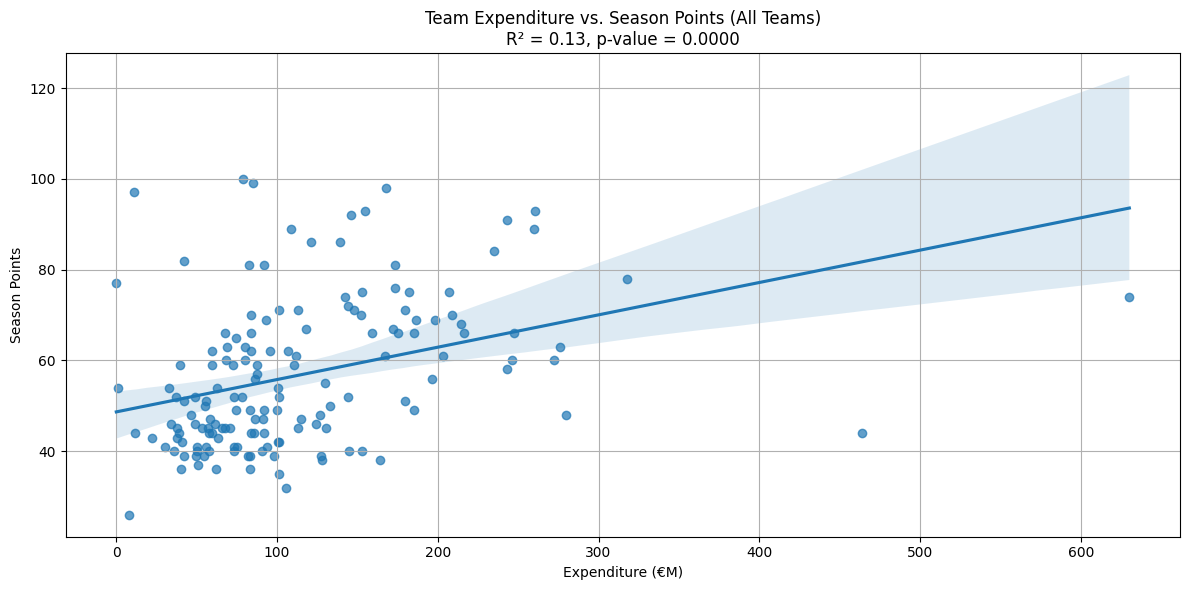

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# CSV'leri yükle
expenditure_df = pd.read_csv('/content/drive/MyDrive/DSA_210/expenditure.csv')
points_df = pd.read_csv('/content/drive/MyDrive/DSA_210/success.csv')

# Gerekli sütunları seç
expenditure_df = expenditure_df[['Club', 'Year', 'Expenditure']]
points_df = points_df[['Club', 'Year', 'Points']]

# Verileri yıl ve takım üzerinden birleştir
merged_df = pd.merge(expenditure_df, points_df, on=['Club', 'Year'])

# Scatter plot
plt.figure(figsize=(12, 6))
sns.regplot(data=merged_df, x='Expenditure', y='Points', scatter_kws={'alpha':0.7})

# Regresyon istatistikleri
slope, intercept, r_value, p_value, std_err = linregress(merged_df['Expenditure'], merged_df['Points'])

plt.title(f'Team Expenditure vs. Season Points (All Teams)\nR² = {r_value**2:.2f}, p-value = {p_value:.4f}')
plt.xlabel('Expenditure (€M)')
plt.ylabel('Season Points')
plt.grid(True)
plt.tight_layout()
plt.show()


#### After EDA and understanding EDA, some questions may occur that resulted in the making of these hypotheses:

---

**1. High Transfer Expenditure Leads to Better League Performance**

**Null Hypothesis (H₀):**  
There is no statistically significant relationship between a club’s transfer expenditure and the number of points it earns in a season.

**Alternative Hypothesis (H₁):**  
There is a statistically significant positive relationship between a club’s transfer expenditure and the number of points it earns in a season.

---

Now let's see:

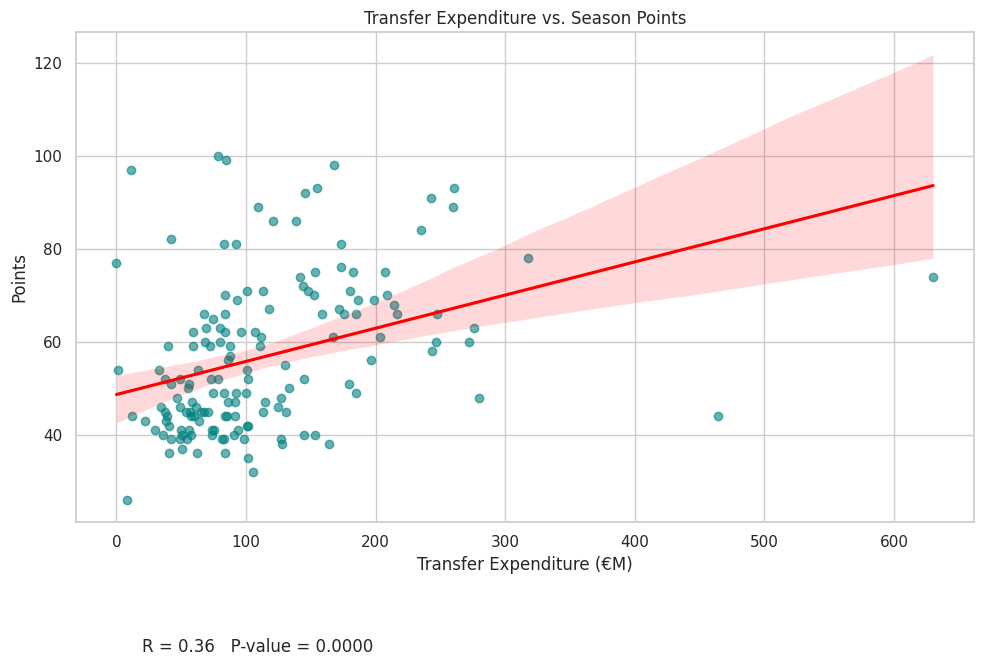

In [19]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Variables
x = merged_df['Expenditure']
y = merged_df['Points']

# Correlation
r_val, p_val = pearsonr(x, y)

# Plot
plt.figure(figsize=(10,6))
sns.regplot(x=x, y=y, scatter_kws={'color':'teal', 'alpha':0.6}, line_kws={'color':'red'})
plt.title("Transfer Expenditure vs. Season Points")
plt.xlabel("Transfer Expenditure (€M)")
plt.ylabel("Points")
plt.figtext(0.15, -0.1, f'R = {r_val:.2f}   P-value = {p_val:.4f}', fontsize=12)
plt.tight_layout()
plt.show()


---
### Hypothesis 1: Does Spending More Lead to More Points?

**Result:**  
- **Pearson correlation coefficient:** `R = 0.36`  
- **P-value:** `0.0000`  

**Conclusion:**  
The analysis reveals a moderate positive correlation (R = 0.36) between transfer expenditure and league points, with a p-value of 0.0000. Since the p-value is well below the typical threshold of 0.05, we **reject the null hypothesis**.

**In other words:**  
Spending more in the transfer market is statistically linked to earning more points in a season. While the relationship isn’t perfect (many exceptions exist), the data clearly supports the idea that greater financial investment tends to result in better on-field


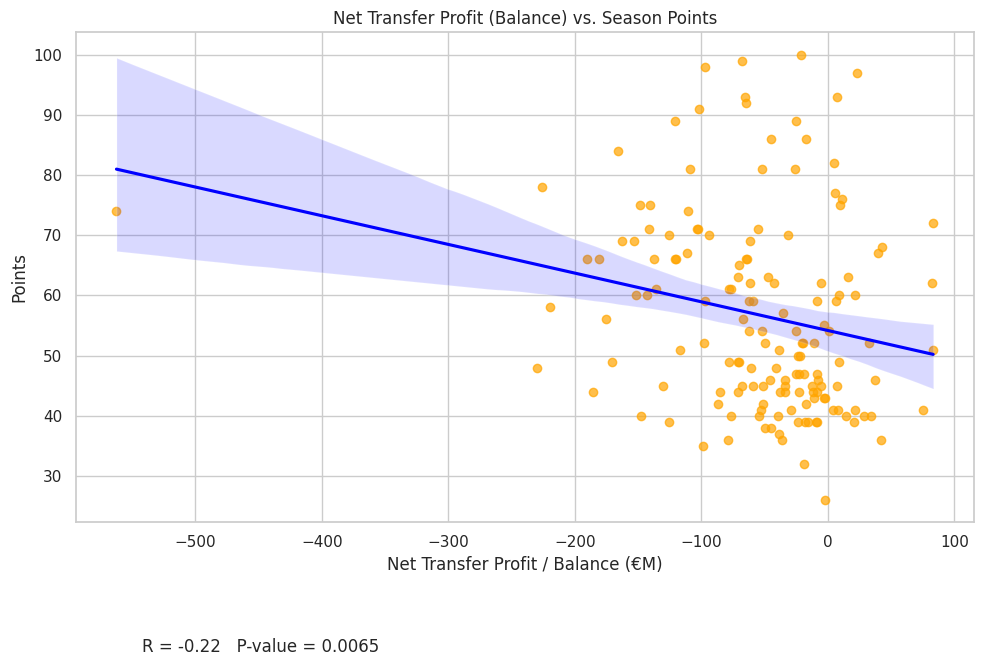

In [22]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
exp_df = pd.read_csv('/content/drive/MyDrive/DSA_210/expenditure_clean.csv')
success_df = pd.read_csv('/content/drive/MyDrive/DSA_210/success_clean.csv')

# Extract relevant columns
balance = exp_df['Balance']
# Make sure Club and Year are aligned for both dataframes
points = success_df['Points']

# If needed, align by Club and Year:
df = pd.merge(exp_df[['Club', 'Year', 'Balance']],
              success_df[['Club', 'Year', 'Points']],
              on=['Club', 'Year'])

x = df['Balance']
y = df['Points']

# Correlation and p-value
r_val, p_val = pearsonr(x, y)

# Plot
plt.figure(figsize=(10,6))
sns.regplot(x=x, y=y, scatter_kws={'color':'orange', 'alpha':0.7}, line_kws={'color':'blue'})
plt.title("Net Transfer Profit (Balance) vs. Season Points")
plt.xlabel("Net Transfer Profit / Balance (€M)")
plt.ylabel("Points")
plt.figtext(0.15, -0.1, f'R = {r_val:.2f}   P-value = {p_val:.4f}', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


---

**Hypothesis 2: Is Net Transfer Profit (Balance) Inversely Related to Season Points?**

**Result:**  
- **Pearson correlation coefficient:** `R = -0.22`  
- **P-value:** `0.0065`  

**Conclusion:**  
The analysis reveals a weak but statistically significant negative correlation between net transfer profit (balance) and league points. With a p-value of 0.0065 (well below the 0.05 threshold), we **reject the null hypothesis**.

**In other words:**  
Clubs that achieve a higher net profit from transfers (that is, they sell more than they buy) tend to earn fewer points in the same season. While the relationship is not strong, the trend is clear: being a “selling club” is associated with slightly lower on-field performance.

---


---

### Hypothesis 3: Does Spending More Lead to Immediate Improvement?

After examining transfer spending and club performance in the EDA, one may ask:  
**Does higher transfer expenditure in one season result in a significant improvement in points the following season?**

**Null Hypothesis (H₀):**  
There is no statistically significant relationship between a club’s transfer expenditure in one season and the change in its league points in the next season.

**Alternative Hypothesis (H₁):**  
There is a statistically significant relationship: higher transfer expenditure in one season is associated with a positive change in league points in the following season.

We will test this hypothesis using actual data.

---


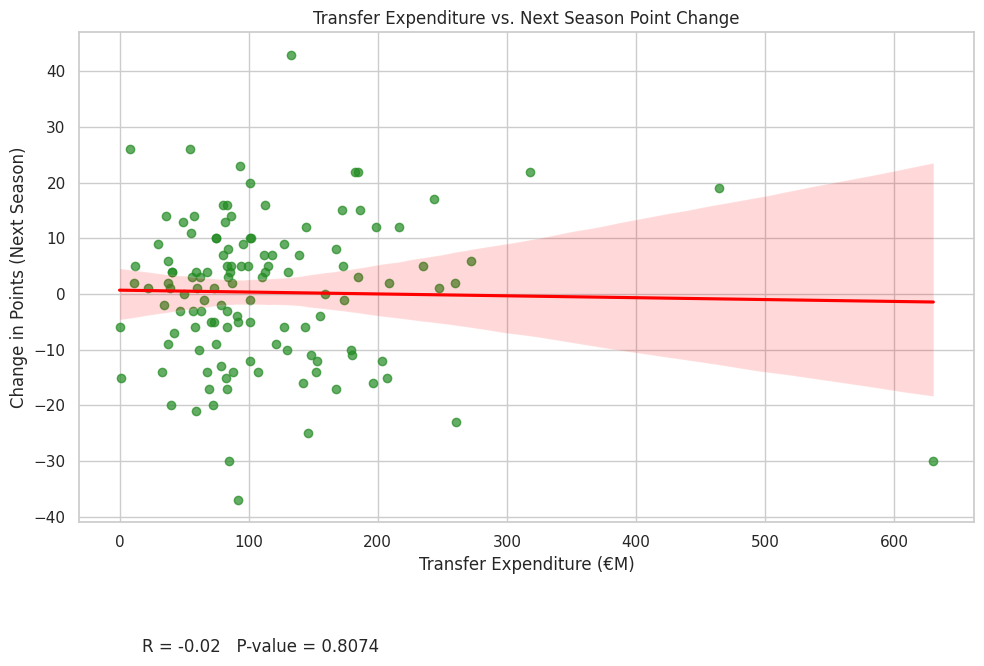

In [23]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
exp_df = pd.read_csv('/content/drive/MyDrive/DSA_210/expenditure_clean.csv')
success_df = pd.read_csv('/content/drive/MyDrive/DSA_210/success_clean.csv')

# Merge on Club and Year for Expenditure and Points
df = pd.merge(
    exp_df[['Club', 'Year', 'Expenditure']],
    success_df[['Club', 'Year', 'Points']],
    on=['Club', 'Year']
)

# Calculate next season's point change for each club
df = df.sort_values(['Club', 'Year'])
df['Next_Season_Points'] = df.groupby('Club')['Points'].shift(-1)
df['Point_Change'] = df['Next_Season_Points'] - df['Points']

# Plot: Expenditure vs Next Season Point Change
x = df['Expenditure']
y = df['Point_Change']

# Drop missing values
mask = y.notnull()
x = x[mask]
y = y[mask]

r_val, p_val = pearsonr(x, y)

plt.figure(figsize=(10,6))
sns.regplot(x=x, y=y, scatter_kws={'color':'forestgreen', 'alpha':0.7}, line_kws={'color':'red'})
plt.title("Transfer Expenditure vs. Next Season Point Change")
plt.xlabel("Transfer Expenditure (€M)")
plt.ylabel("Change in Points (Next Season)")
plt.figtext(0.15, -0.1, f'R = {r_val:.2f}   P-value = {p_val:.4f}', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


---
**Hypothesis 3: Does Spending More Lead to Immediate Improvement?**

**Result:**  
- **Pearson correlation coefficient:** `R = -0.02`  
- **P-value:** `0.8074`  

**Conclusion:**  
This analysis finds virtually no linear relationship between transfer expenditure in one season and the change in league points in the following season (R = -0.02). The very high p-value (0.8074) is far above the 0.05 threshold, so we **fail to reject the null hypothesis**.

**In other words:**  
Spending more on transfers does **not** statistically guarantee improvement in league performance the next season. Clubs that spend heavily do not, on average, see a meaningful boost (or drop) in their point totals in the following year.

---

---

### Hypothesis 4: Can player seller Clubs Maintain Their Performance?

Some clubs are famous for selling high-value players and generating substantial transfer income. But can they maintain their league performance while making money on the transfer market?

**Null Hypothesis (H₀):**  
There is no statistically significant relationship between a club’s transfer income (from player sales) and its league points in the same season.

**Alternative Hypothesis (H₁):**  
There is a statistically significant relationship: clubs with higher transfer income are able to maintain or even improve their league points in the same season.

Let's test this hypothesis with real data.

---

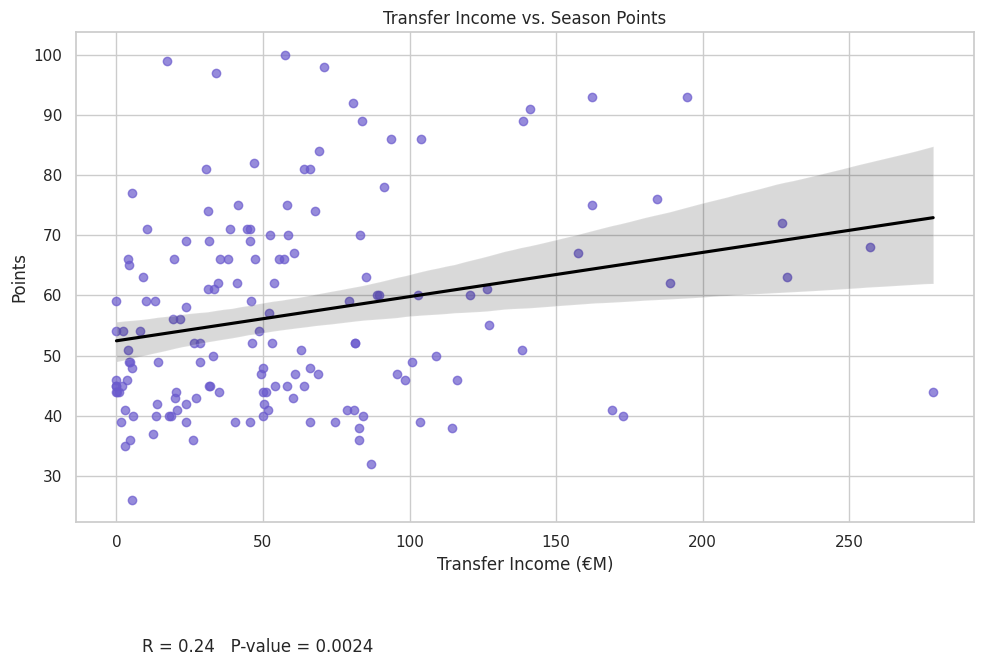

In [24]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
exp_df = pd.read_csv('/content/drive/MyDrive/DSA_210/expenditure_clean.csv')
success_df = pd.read_csv('/content/drive/MyDrive/DSA_210/success_clean.csv')

# Merge to align Income and Points for each Club/Year
df = pd.merge(
    exp_df[['Club', 'Year', 'Income']],
    success_df[['Club', 'Year', 'Points']],
    on=['Club', 'Year']
)

x = df['Income']
y = df['Points']

r_val, p_val = pearsonr(x, y)

plt.figure(figsize=(10,6))
sns.regplot(x=x, y=y, scatter_kws={'color':'slateblue', 'alpha':0.7}, line_kws={'color':'black'})
plt.title("Transfer Income vs. Season Points")
plt.xlabel("Transfer Income (€M)")
plt.ylabel("Points")
plt.figtext(0.15, -0.1, f'R = {r_val:.2f}   P-value = {p_val:.4f}', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


---

**Hypothesis 4: Can Selling Clubs Maintain Their Performance?**

**Result:**  
- **Pearson correlation coefficient:** `R = 0.24`  
- **P-value:** `0.0024`  

**Conclusion:**  
This analysis reveals a weak but statistically significant positive correlation between transfer income (from player sales) and league points in the same season. The p-value (0.0024) is well below the 0.05 threshold, so we **reject the null hypothesis**.

**In other words:**  
Clubs that generate higher transfer income are, on average, able to maintain or even improve their league points in the same season. This suggests that selling valuable players does not necessarily harm a club’s immediate on-field performance—and in some cases, it may even coincide with sporting success.

---
